In [1]:
# 주로 사용하는 코드 2 : 인식한 GPU 개수 출력
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
"""
layer 깊게 쌓으면 gradient vanishing
깊이가 깊어져 training error high(파라미터 수가 많아져서)

layer depth에 따른 training error 한 번 해보는 것도 도움 될듯

residual learning
결과의 오류정도 
"""

Train set
Image : (48000, 28, 28, 1)
Label : (48000,)
Validation set
Image : (12000, 28, 28, 1)
Label : (12000,)
Train&Validation set
Image : (10000, 28, 28, 1)
Label : (10000,)
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 8s - loss: 0.1238 - accuracy: 0.9615 - val_loss: 0.0549 - val_accuracy: 0.9829
Epoch 2/10
48000/48000 - 8s - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0485 - val_accuracy: 0.9848
Epoch 3/10
48000/48000 - 8s - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0472 - val_accuracy: 0.9869
Epoch 4/10
48000/48000 - 8s - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0479 - val_accuracy: 0.9867
Epoch 5/10
48000/48000 - 9s - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0476 - val_accuracy: 0.9883
Epoch 6/10
48000/48000 - 8s - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0545 - val_accuracy: 0.9883
Epoch 7/10
48000/48000 - 8s - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0439 - val_accuracy: 0.9897
Epoch 8/10
48000/48000 - 8s - loss: 0.0111 -

C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\ipykernel_launcher.py:99: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


10000/10000 - 0s - loss: 0.0465 - accuracy: 0.9904
Test loss : 0.0465	 Test accuracy : 99.04%
Probability is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


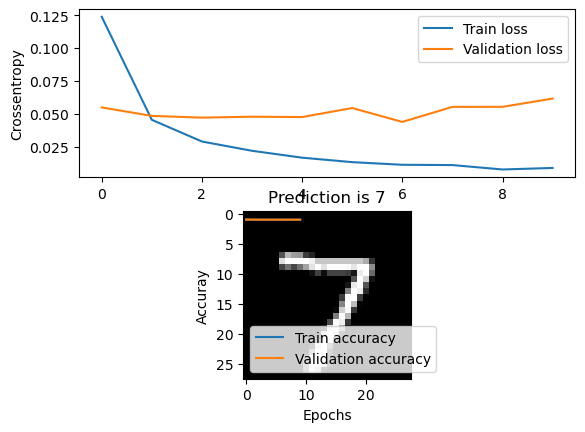

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

def load_mnist_dataset():
  (train_validation_images, train_validation_labels),(test_images, test_labels)=mnist.load_data()
  """
  numpy 행렬로 만들어준다. 원래 28*28 이미지 데이터 근데 저장은 1차원으로 펴서 28*28=784개의
  열을 가진 1차원 행렬(1X784)로 변환되어 저장되어 있다. 이를 다시 28X28로 다시 reshape해주는 것
  """

  train_validation_images=train_validation_images.reshape(-1,28,28,1)
  """
  reshape(데이터개수, 가로픽셀, 세로픽셀, 채널) 이 경우 데이터개수에 -1이 넣어진 것은
  있는 데이터 개수를 그대로 사용하겠다는 의미
  흑백 사진이기 때문에 채널이 1이다. RGB 면 채널 3
  """
  test_images=test_images.reshape(-1,28,28,1)

  train_validation_images=train_validation_images/255
  test_images=test_images/255
  """
  mnist 데이터셋 각 픽셀은 0-255의 값을 가진다.(그레이스케일 이미지의 픽셀 강도)
  이를 255로 나눠 0-1값을 갖도록 만든다.
  """

  n_train_validation=train_validation_images.shape[0]
  """
  이미 train_image를 (-1,28,28,1)로 shape했잖아. [자리]에 해당하는 것을 출력
  [0]=데이터 수, [1]=28, [2]=28, [3]=1
  """

  train_ratio=0.8 #80%만 train 데이터로 쓰려고
  n_train=int(n_train_validation*train_ratio) #개수로 나타냄
  n=int(train_validation_images.shape[3])

  train_x=train_validation_images[:n_train] #처음부터 n_train까지의 인덱스 선택
  train_y=train_validation_labels[:n_train]
  validation_x=train_validation_images[n_train:]
  validation_y=train_validation_labels[n_train:] #데이터 자체가 train 과 test의 구분밖에 없네
  test_x=test_images
  test_y=test_labels

  print('Train set')
  print('Image :', train_x.shape)
  print('Label :', train_y.shape)
  print('Validation set')
  print('Image :', validation_x.shape)
  print('Label :', validation_y.shape)
  print('Train&Validation set')
  print('Image :', test_x.shape)
  print('Label :', test_y.shape)

  return train_x, train_y, validation_x, validation_y, test_x, test_y
  #함수 호출 시 이 값만을 반환. 받으려면 임의 자리 정해줘야 해.


train_x, train_y, validation_x, validation_y, test_x, test_y=load_mnist_dataset()

model=Sequential() #input부터 output까지 차곡 차곡 layer 쌓아줘
model.add(Conv2D(filters=24,kernel_size=(3,3),padding='valid', activation='relu'))
"""
Conv2D 는 2D 합성곱 수행: 채널 24개  kernel_size 는 필터 사이즈, valid는 no padding
만약에 padding='same' 이면 zero padding 이다.
"""
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#nxn(pool)을 중요한 정보(Max) 한 개로 줄인다. 즉 4->1
model.add(Conv2D(filters=36,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#크기 줄인거 Fully connected(dense net)에 먹이기
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #0-9까지의 숫자 분류하는 거니까
#Value=그냥 output받기, O/X문제=output에 sigmoid, 종류중에 요건 뭐냐(category)=output에 softmax
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#Train model
history=model.fit(train_x,train_y,batch_size=9,epochs=10, verbose=2, validation_data=(validation_x,validation_y))

fig,axes =plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'],label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuray')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()
print()
#Test model
result=model.evaluate(test_x,test_y,verbose=2)
print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0],result[1]*100))

prediction=model.predict(test_x)
plt.imshow(test_x[0],'gray')
print('Probability is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[0])))
plt.show()